In [1]:
import matplotlib as mpl
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.pyplot import figure


## Rading and Modifying data files

In [2]:
# .set_option() changes behavior globaly in Jupyter Notebooks, so it is not a temporary fix.

pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)

#Or to almost completely suppress scientific notation without losing precision, try this:
#pd.set_option('display.float_format', str)

#### Drug_Data

In [3]:
df=  pd.read_csv(r"C:\Users\IMBS\Downloads\programming\data_science_drug\Healthcare_dataset.csv")

In [4]:
df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,VLR_LR,<=-2.5,No change,Unknown,Adherent,N,Y,N,Y,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,HR_VHR,<=-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,Y,0,N,N,N,HR_VHR,>-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,N,Y,Y,N,Y,N,N,Y,N,N,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,Y,0,N,N,N,HR_VHR,<=-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,Y,Y,Y,N,N,N,N,Y,Y,N,N,N,N,N,N,Y,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1


In [5]:
df.shape

(3424, 69)

## Data Manupulation

#### Unique type of each column

In [5]:
for column in df.columns:
    print(column,(df[column].unique()))

Ptid ['P1' 'P2' 'P3' ... 'P3422' 'P3423' 'P3424']
Persistency_Flag ['Persistent' 'Non-Persistent']
Gender ['Male' 'Female']
Race ['Caucasian' 'Asian' 'Other/Unknown' 'African American']
Ethnicity ['Not Hispanic' 'Hispanic' 'Unknown']
Region ['West' 'Midwest' 'South' 'Other/Unknown' 'Northeast']
Age_Bucket ['>75' '55-65' '65-75' '<55']
Ntm_Speciality ['GENERAL PRACTITIONER' 'Unknown' 'ENDOCRINOLOGY' 'RHEUMATOLOGY'
 'ONCOLOGY' 'PATHOLOGY' 'OBSTETRICS AND GYNECOLOGY'
 'PSYCHIATRY AND NEUROLOGY' 'ORTHOPEDIC SURGERY'
 'PHYSICAL MEDICINE AND REHABILITATION' 'SURGERY AND SURGICAL SPECIALTIES'
 'PEDIATRICS' 'PULMONARY MEDICINE' 'HEMATOLOGY & ONCOLOGY' 'UROLOGY'
 'PAIN MEDICINE' 'NEUROLOGY' 'RADIOLOGY' 'GASTROENTEROLOGY'
 'EMERGENCY MEDICINE' 'PODIATRY' 'OPHTHALMOLOGY' 'OCCUPATIONAL MEDICINE'
 'TRANSPLANT SURGERY' 'PLASTIC SURGERY' 'CLINICAL NURSE SPECIALIST'
 'OTOLARYNGOLOGY' 'HOSPITAL MEDICINE' 'ORTHOPEDICS' 'NEPHROLOGY'
 'GERIATRIC MEDICINE' 'HOSPICE AND PALLIATIVE MEDICINE'
 'OBSTETRICS & O

In [6]:
print(df.dtypes.head(30))

Ptid                                                               object
Persistency_Flag                                                   object
Gender                                                             object
Race                                                               object
Ethnicity                                                          object
Region                                                             object
Age_Bucket                                                         object
Ntm_Speciality                                                     object
Ntm_Specialist_Flag                                                object
Ntm_Speciality_Bucket                                              object
Gluco_Record_Prior_Ntm                                             object
Gluco_Record_During_Rx                                             object
Dexa_Freq_During_Rx                                                 int64
Dexa_During_Rx                        

In [7]:
for column in df.columns:
                print(type(df.loc[1,column]))


<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'numpy.int64'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'numpy.int64'>


In [ ]:
df['Tscore_Bucket_During_Rx']

In [ ]:
df[df['Tscore_Bucket_During_Rx'].str.contains("Unknown")]

In [ ]:
print(df['Tscore_Bucket_During_Rx'].isnull())

In [ ]:
df['Race'].fillna('Na')

In [ ]:
df.Tscore_Bucket_During_Rx = pd.factorize(df.Tscore_Bucket_During_Rx, na_sentinel=-2)[0] + 1

In [ ]:
df["Tscore_Bucket_During_Rx"]

In [ ]:
df.Tscore_Bucket_During_Rx.replace(-1, np.nan).interpolate().astype(int)

In [ ]:
df.fillna(df.select_dtypes(include='object').mode().iloc[0], inplace=True)

#### Separating Persistent and Non Persistent

In [9]:
df_Persistent = df[df['Persistency_Flag'] == 'Persistent']
df_Non_Persistent = df[df['Persistency_Flag'] == 'Non-Persistent']

In [10]:
len(df_Persistent.iloc[:,1])

1289

In [11]:
len(df_Non_Persistent.iloc[:,1])

2135

In [ ]:
df_Persistent

In [ ]:
df_Non_Persistent

In [58]:
df_Male = df[df['Gender'] == 'Male']
df_Female = df[df['Gender'] == 'Female']

### Gender

In [94]:
# Group by gender for individuals with non drug persistency
target1 = df_Non_Persistent.groupby(['Gender']).agg({'Persistency_Flag':'count'}).reset_index()
target1

,Gender,Persistency_Flag
0,Female,2018
1,Male,117


In [95]:
# Group by gender for individuals with drug persistency
target = df_Persistent.groupby(['Gender']).agg({'Persistency_Flag':'count'}).reset_index()
target

,Gender,Persistency_Flag
0,Female,1212
1,Male,77


In [97]:

target['persistent'] = target1['Persistency_Flag']
target['Non persistent'] = target['Persistency_Flag']
target.drop('Persistency_Flag', axis=1, inplace=True)
target


,Gender,persistent,Non persistent
0,Female,2018,1212
1,Male,117,77


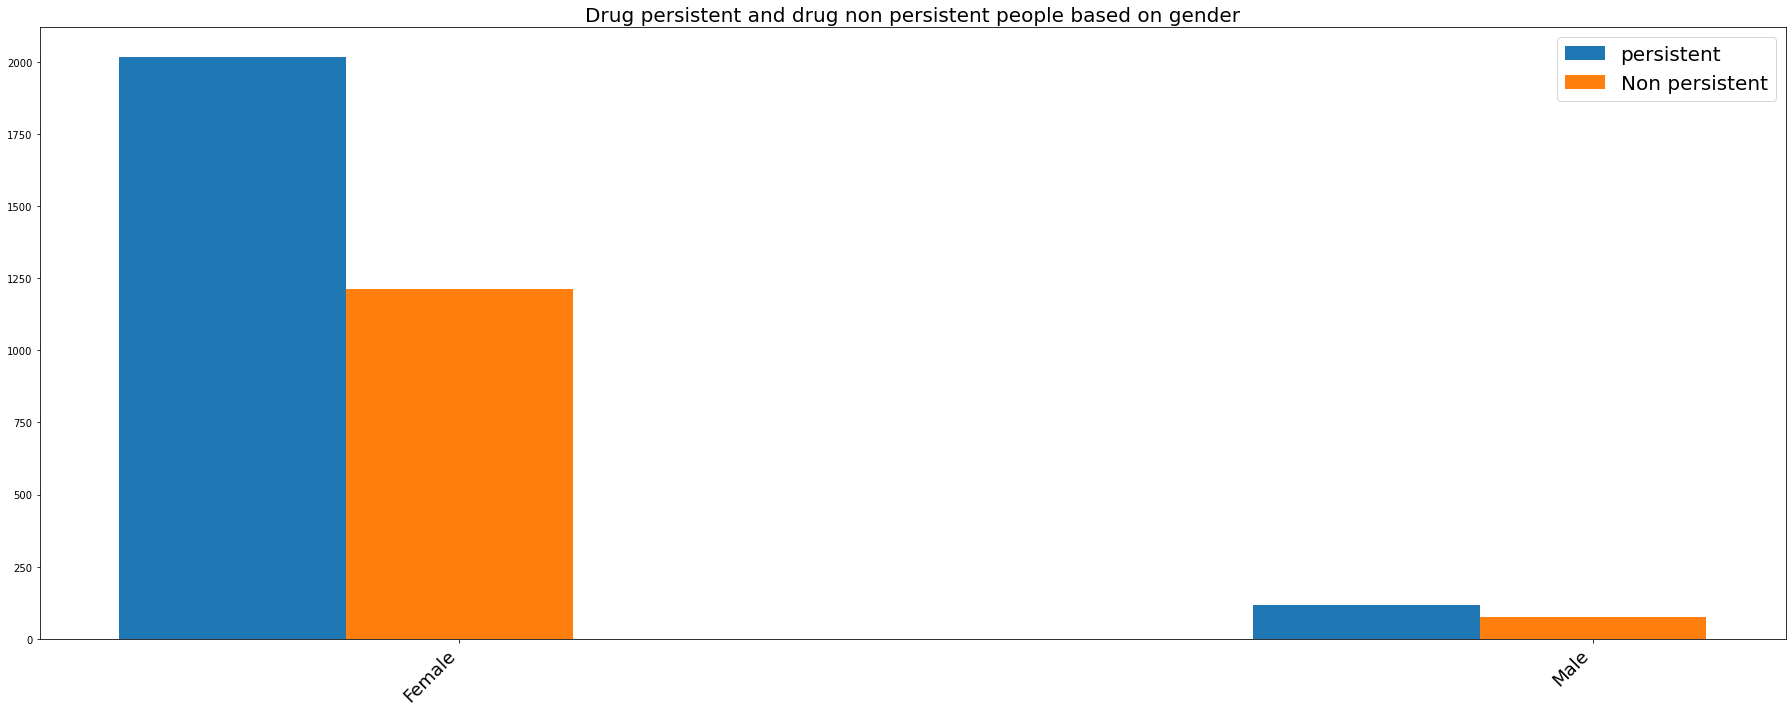

In [99]:
for i in range(len(target.index)) : 
    target.iloc[i,1] = pd.to_numeric(target.iloc[i,1])

labels = target['Gender']
    
x = np.arange(len(labels))  # the label locations
width = .2 # the width of the bars

fig, ax = plt.subplots(figsize=(25,10))
rects1 = ax.bar(x - width, target['persistent'],width,  label='persistent')
rects2 = ax.bar(x , target['Non persistent'],width, label='Non persistent')
#rects3 = ax.bar(x + width, real_value['Profit'],width, label='Profit')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('', fontsize=20)
ax.set_title('Drug persistent and drug non persistent people based on gender', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(fontsize=20)
ax.ticklabel_format(axis="y",useOffset=False,style='plain', useLocale=True)
plt.xticks( rotation=45,fontsize=18, ha="right")
    
fig.tight_layout()

plt.show()

### risk_region

In [12]:
risk_region = df.groupby(['Region']).agg({'Count_Of_Risks':'mean'}).reset_index()
risk_region

,Region,Count_Of_Risks
0,Midwest,1.10
1,Northeast,1.32
2,Other/Unknown,1.17
3,South,1.41
4,West,1.18


### Age_Bucket

In [63]:
target = df_Persistent.groupby(['Age_Bucket']).agg({'Persistency_Flag':'count'}).reset_index()
target

,Age_Bucket,Persistency_Flag
0,55-65,261
1,65-75,433
2,<55,63
3,>75,532


(-1.201799247615281,
 1.329241816555765,
 -1.1887648021913586,
 1.1609588305537815)

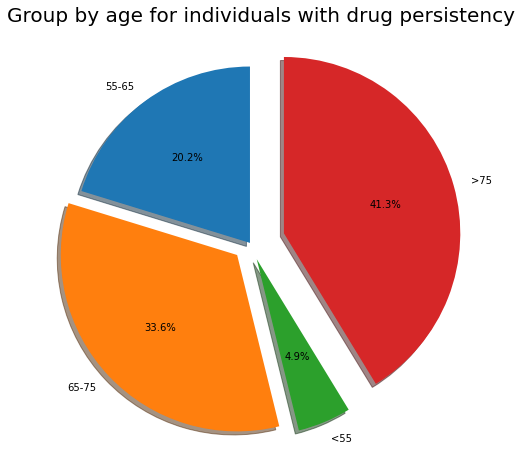

In [65]:
# Group by age for individuals with drug persistency

for i in range(len(target.index)) : 
    target.iloc[i,1] = pd.to_numeric(target.iloc[i,1])
import matplotlib.pyplot as plt
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = target.iloc[:,0]

sizes = target.iloc[:,1]
explode = (0, 0.1,.1,.2)  # only "explode" the 2nd slice (i.e. 'Hogs')
plt.figure(figsize=(8,8))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Group by age for individuals with drug persistency', fontsize=20)

plt.axis('equal')

In [55]:
risk_region = df_Non_Persistent.groupby(['Age_Bucket']).agg({'Persistency_Flag':'count'}).reset_index()
risk_region

,Age_Bucket,Persistency_Flag
0,55-65,472
1,65-75,653
2,<55,103
3,>75,907


In [56]:
for i in range(len(risk_region.index)) : 
    risk_region.iloc[i,1] = pd.to_numeric(risk_region.iloc[i,1])

(-1.1989147466600947,
 1.334362329810391,
 -1.1895771411081184,
 1.153290343616297)

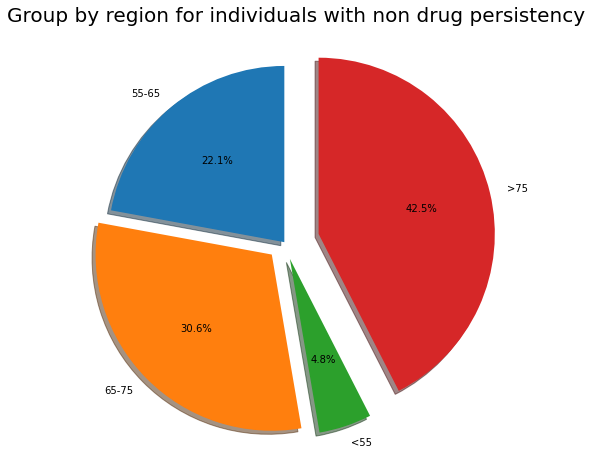

In [57]:
# Group by region for individuals with drug persistency
import matplotlib.pyplot as plt
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = risk_region.iloc[:,0]


sizes = risk_region.iloc[:,1]
explode = (0, 0.1,.1,.2)  # only "explode" the 2nd slice (i.e. 'Hogs')
plt.figure(figsize=(8,8))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Group by region for individuals with non drug persistency', fontsize=20)

plt.axis('equal')

### Count of risks in average

In [161]:
target1 = df_Persistent.groupby(['Gender']).agg({'Count_Of_Risks':'mean'}).reset_index()
target1

,Gender,Count_Of_Risks
0,Female,1.36
1,Male,1.31


In [162]:
target = df_Non_Persistent.groupby(['Gender']).agg({'Count_Of_Risks':'mean'}).reset_index()
target['persistent'] = target1['Count_Of_Risks']
target['Non persistent'] = target['Count_Of_Risks']
target.drop('Count_Of_Risks', axis=1, inplace=True)
target


,Gender,persistent,Non persistent
0,Female,1.36,1.17
1,Male,1.31,1.21


#### Both male and female with non drug persistence has less counts of risks in average

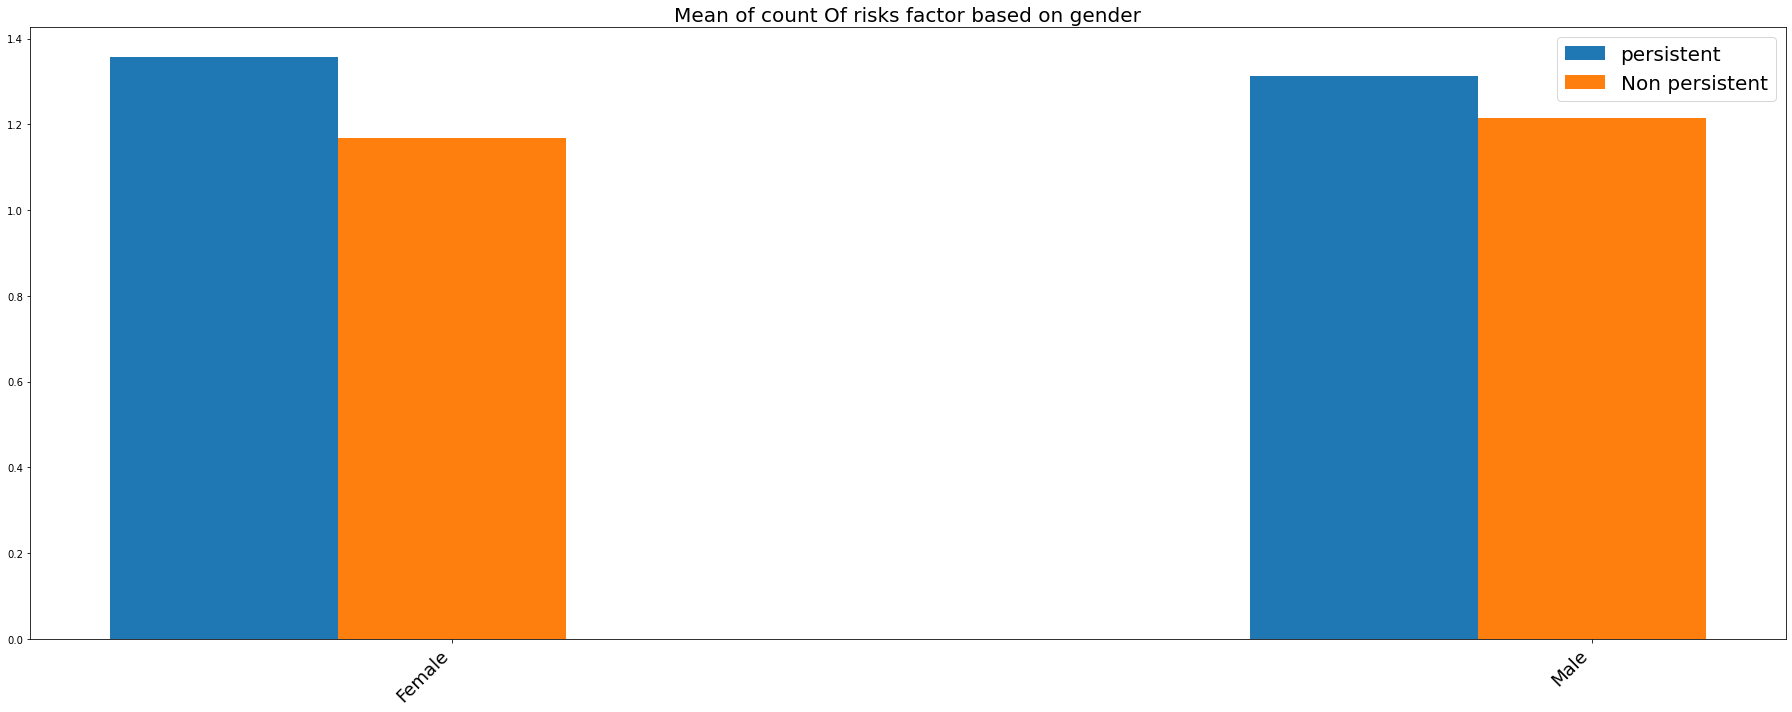

In [163]:
for i in range(len(target.index)) : 
    target.iloc[i,1] = pd.to_numeric(target.iloc[i,1])

labels = target['Gender']
    
x = np.arange(len(labels))  # the label locations
width = .2 # the width of the bars

fig, ax = plt.subplots(figsize=(25,10))
rects1 = ax.bar(x - width, target['persistent'],width,  label='persistent')
rects2 = ax.bar(x , target['Non persistent'],width, label='Non persistent')
#rects3 = ax.bar(x + width, real_value['Profit'],width, label='Profit')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('', fontsize=20)
ax.set_title('Mean of count Of risks factor based on gender', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(fontsize=20)
ax.ticklabel_format(axis="y",useOffset=False,style='plain', useLocale=True)
plt.xticks( rotation=45,fontsize=18, ha="right")
    
fig.tight_layout()

plt.show()

### Count_Of_Risks

In [165]:
target = df_Persistent.groupby(['Count_Of_Risks']).agg({'Persistency_Flag':'count'}).reset_index()
target

,Count_Of_Risks,Persistency_Flag
0,0,312
1,1,471
2,2,314
3,3,138
4,4,41
5,5,9
6,6,3
7,7,1


In [166]:
target1 = df_Non_Persistent.groupby(['Count_Of_Risks']).agg({'Persistency_Flag':'count'}).reset_index()
target1

,Count_Of_Risks,Persistency_Flag
0,0,658
1,1,771
2,2,467
3,3,179
4,4,50
5,5,6
6,6,3
7,7,1


In [167]:
target['persistent'] = target1['Persistency_Flag']
target['Non persistent'] = target['Persistency_Flag']
target.drop('Persistency_Flag', axis=1, inplace=True)
target


,Count_Of_Risks,persistent,Non persistent
0,0,658,312
1,1,771,471
2,2,467,314
3,3,179,138
4,4,50,41
5,5,6,9
6,6,3,3
7,7,1,1


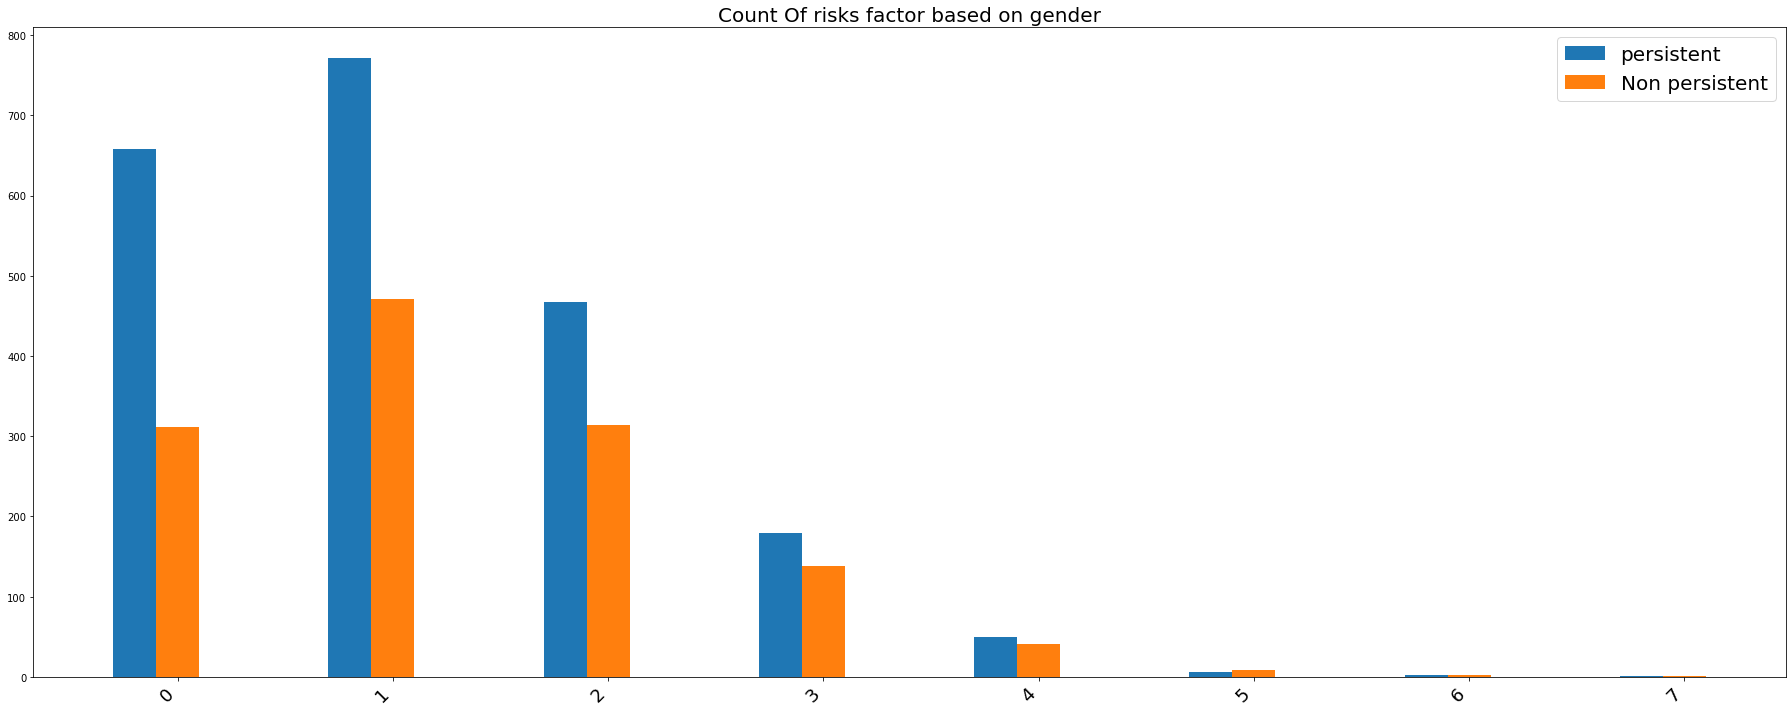

In [168]:
for i in range(len(target.index)) : 
    target.iloc[i,1] = pd.to_numeric(target.iloc[i,1])

labels = target['Count_Of_Risks']
    
x = np.arange(len(labels))  # the label locations
width = .2 # the width of the bars

fig, ax = plt.subplots(figsize=(25,10))
rects1 = ax.bar(x - width, target['persistent'],width,  label='persistent')
rects2 = ax.bar(x , target['Non persistent'],width, label='Non persistent')
#rects3 = ax.bar(x + width, real_value['Profit'],width, label='Profit')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('', fontsize=20)
ax.set_title('Count Of risks factor based on gender', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(fontsize=20)
ax.ticklabel_format(axis="y",useOffset=False,style='plain', useLocale=True)
plt.xticks( rotation=45,fontsize=18, ha="right")
    
fig.tight_layout()

plt.show()

In [30]:
Race = df_Persistent.groupby(['Race']).agg({'Persistency_Flag':'count'}).reset_index()
Race

,Race,Persistency_Flag
0,African American,30
1,Asian,41
2,Caucasian,1185
3,Other/Unknown,33


In [29]:
Race = df_Non_Persistent.groupby(['Race']).agg({'Persistency_Flag':'count'}).reset_index()
Race

,Race,Persistency_Flag
0,African American,65
1,Asian,43
2,Caucasian,1963
3,Other/Unknown,64


In [23]:
df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,VLR_LR,<=-2.5,No change,Unknown,Adherent,N,Y,N,Y,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,HR_VHR,<=-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,Y,0,N,N,N,HR_VHR,>-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,N,Y,Y,N,Y,N,N,Y,N,N,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,Y,0,N,N,N,HR_VHR,<=-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,Y,Y,Y,N,N,N,N,Y,Y,N,N,N,N,N,N,Y,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1


# Dealing with missing values

### Initially, it seems there is no missing values, but ...

In [106]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [107]:
missing_values_table(df)

Your selected dataframe has 69 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [9]:
df.Dexa_Freq_During_Rx.unique()

array([  0,   2,   7,   3,   5,  20,  13,   1,   6,  12,   4,  10,  25,
        11,  18,  21,  15,  28,  22,  37,  14,   8,   9,  17,  81,  42,
        16,  30,  19,  45,  27,  24,  58,  26,  23,  33, 110,  36,  34,
        88,  66,  32, 118,  48,  69,  38,  40,  68,  52,  50, 146,  44,
        35,  39, 108,  54,  72,  29], dtype=int64)

In [10]:
df.Dexa_Freq_During_Rx.isnull().sum()

0

### But if we convert unknown variables as missing values, there are lots of missed values

In [108]:
new_df = df.Risk_Segment_During_Rx.str.split(expand=True).stack().value_counts().reset_index()

new_df.columns = ['Word', 'Frequency'] 

new_df

,Word,Frequency
0,Unknown,1497
1,HR_VHR,965
2,VLR_LR,962


## Method 1, Dropping columns or rows including missing values:


### Dropping columns with more than 30% missing values

In [109]:
list_column_with_nulls = []

for column in df.columns:
    n_missed = len(df[df.loc[:,column]=='Other/Unknown'])+ len(df[df.loc[:,column]=='Unknown'])
    percent = n_missed/3424
    if percent > 0.3:
        print(column)
        print("percentage of missing values :", round(percent, 2))
        list_column_with_nulls.append(column)

Risk_Segment_During_Rx
percentage of missing values : 0.44
Tscore_Bucket_During_Rx
percentage of missing values : 0.44
Change_T_Score
percentage of missing values : 0.44
Change_Risk_Segment
percentage of missing values : 0.65


In [110]:
len(list_column_with_nulls)

4

#### Dropping list_column_with_nulls

In [111]:
df.drop([col for col in list_column_with_nulls], axis=1, inplace=True)

### Dropping rows with more than 2% missing values

In [112]:
rows_with_missing_values = []
for i in range(len(df)) :
    n=0
    s = []
    for j in df.columns:
        if (df.loc[i,j]=='Other/Unknown') | (df.loc[i,j]=='Unknown'):
            n=n+1
            s.append(j)
    if (n/69 > 0.02):
        print('row :',i, '    number of missing values :', n)
        print('Columns including missing values :',s)
        rows_with_missing_values.append(i)

row : 154     number of missing values : 2
Columns including missing values : ['Race', 'Ethnicity']
row : 218     number of missing values : 2
Columns including missing values : ['Race', 'Ethnicity']
row : 221     number of missing values : 2
Columns including missing values : ['Race', 'Ntm_Speciality']
row : 406     number of missing values : 2
Columns including missing values : ['Race', 'Ethnicity']
row : 822     number of missing values : 2
Columns including missing values : ['Race', 'Region']
row : 950     number of missing values : 2
Columns including missing values : ['Race', 'Ethnicity']
row : 952     number of missing values : 2
Columns including missing values : ['Ethnicity', 'Ntm_Speciality']
row : 1236     number of missing values : 2
Columns including missing values : ['Ethnicity', 'Ntm_Speciality']
row : 1285     number of missing values : 2
Columns including missing values : ['Race', 'Ethnicity']
row : 1288     number of missing values : 3
Columns including missing values

#### Dropping rows_with_missing_values

In [113]:
df = df[~df.index.isin(rows_with_missing_values)]

In [114]:
df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,Adherent,N,Y,N,Y,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,Adherent,N,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,HR_VHR,<=-2.5,Adherent,N,Y,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,Y,0,N,N,N,HR_VHR,>-2.5,Adherent,N,Y,N,Y,Y,N,Y,N,N,Y,N,N,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,Y,0,N,N,N,HR_VHR,<=-2.5,Adherent,N,Y,Y,Y,Y,N,N,N,N,Y,Y,N,N,N,N,N,N,Y,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1


In [115]:
df.shape

(3379, 65)

## Method 2, Imputation method for categorical columns:


#### Defining Unknown and Other/Unknown as null for pandas

In [116]:
for column in df.columns:
     if(type(df.loc[1,column]) ==str):
            df[column] = df[column].replace({'Unknown': np.nan})
            df[column] = df[column].replace({'Other/Unknown': np.nan})            

<ipython-input-116-18e3f391e858>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].replace({'Unknown': np.nan})
<ipython-input-116-18e3f391e858>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].replace({'Other/Unknown': np.nan})


#### Number of nulls in each column

In [117]:
n_null = df.isnull().sum(axis = 0)
n_null.head(60)

Ptid                                                                    0
Persistency_Flag                                                        0
Gender                                                                  0
Race                                                                   64
Ethnicity                                                              58
Region                                                                 55
Age_Bucket                                                              0
Ntm_Speciality                                                        290
Ntm_Specialist_Flag                                                     0
Ntm_Speciality_Bucket                                                   0
Gluco_Record_Prior_Ntm                                                  0
Gluco_Record_During_Rx                                                  0
Dexa_Freq_During_Rx                                                     0
Dexa_During_Rx                        

#### Filling nulls of each column with the most frequent (mode) of each column

In [118]:
df = df.fillna(df.mode().iloc[0])

#### Any null in data?

In [119]:
df.isnull().values.any()

False

## Method 3, predicting The Missing Values

In [120]:
df=  pd.read_csv(r"C:\Users\IMBS\Downloads\programming\data_science_drug\Healthcare_dataset.csv")

#### Finding columns with more than 0.3 missed values and defining their missed values as nan

In [121]:
Data_with_nulls = []

for column in df.columns:
    n_missed = len(df[df.loc[:,column]=='Other/Unknown'])+ len(df[df.loc[:,column]=='Unknown'])
    percent = n_missed/3424
    if percent > 0.3:
        Data_with_nulls.append(column)

In [122]:
for column in Data_with_nulls:
     if(type(df.loc[1,column]) ==str):
            df[column] = df[column].replace({'Unknown': np.nan})
            df[column] = df[column].replace({'Other/Unknown': np.nan})         

#### Removing columns with more than 0.3 missed values and just adding one of them as target value

In [123]:
data_without_null_1 = df.drop([col for col in Data_with_nulls], axis=1)

In [124]:
data_without_null_1['Risk_Segment_During_Rx']=df['Risk_Segment_During_Rx']

#### Converting data type to digit

In [125]:

for column in data_without_null_1.columns:
        data_without_null_1.loc[:,column] = pd.factorize(data_without_null_1.loc[:,column], na_sentinel=-2)[0] + 1

In [126]:
data_without_null_1

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks,Risk_Segment_During_Rx
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,2,2,1,2,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,2,1,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1
2,3,2,2,3,2,2,3,1,1,1,1,1,1,1,1,1,2,2,1,1,1,2,2,1,1,1,2,1,2,2,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,2,1,1,1,1,1,1,1,2,2
3,4,2,2,1,1,2,1,1,1,1,1,2,1,1,1,1,2,1,1,1,1,1,1,1,1,2,2,1,1,2,1,2,1,1,2,1,2,2,1,1,1,1,1,1,2,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,3,2
4,5,2,2,1,1,2,1,1,1,1,2,2,1,1,1,1,2,2,1,1,1,2,1,1,1,1,2,1,1,1,1,1,1,1,1,1,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,3,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,3420,1,2,1,1,3,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,2,2,1,2,1,2,1,1,2,2,2,1,1,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,3,-1
3420,3421,1,2,1,1,3,1,2,1,1,1,1,1,1,1,1,2,2,2,2,1,1,2,2,1,1,2,1,2,2,1,1,1,1,1,1,1,1,2,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1
3421,3422,1,2,1,1,3,1,3,2,2,1,1,3,2,1,1,1,1,1,2,1,2,2,2,2,2,2,1,2,2,1,2,1,1,1,2,2,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,3,2
3422,3423,2,2,1,1,3,2,2,1,1,1,1,1,1,1,2,1,1,1,2,1,2,2,2,1,1,2,1,2,2,1,2,1,1,1,1,2,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1


#### Replacing '-1' values with 'nan' for the last column

In [127]:
for i in range(len(data_without_null_1)) :
    if ((data_without_null_1['Risk_Segment_During_Rx'].iloc[i])== -1):
        (data_without_null_1['Risk_Segment_During_Rx'].iloc[i]) = np.NaN


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [128]:
data_without_null_1

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks,Risk_Segment_During_Rx
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1.00
1,2,2,1,2,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,2,1,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,nan
2,3,2,2,3,2,2,3,1,1,1,1,1,1,1,1,1,2,2,1,1,1,2,2,1,1,1,2,1,2,2,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,2,1,1,1,1,1,1,1,2,2.00
3,4,2,2,1,1,2,1,1,1,1,1,2,1,1,1,1,2,1,1,1,1,1,1,1,1,2,2,1,1,2,1,2,1,1,2,1,2,2,1,1,1,1,1,1,2,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,3,2.00
4,5,2,2,1,1,2,1,1,1,1,2,2,1,1,1,1,2,2,1,1,1,2,1,1,1,1,2,1,1,1,1,1,1,1,1,1,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,3,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,3420,1,2,1,1,3,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,2,2,1,2,1,2,1,1,2,2,2,1,1,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,3,nan
3420,3421,1,2,1,1,3,1,2,1,1,1,1,1,1,1,1,2,2,2,2,1,1,2,2,1,1,2,1,2,2,1,1,1,1,1,1,1,1,2,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,nan
3421,3422,1,2,1,1,3,1,3,2,2,1,1,3,2,1,1,1,1,1,2,1,2,2,2,2,2,2,1,2,2,1,2,1,1,1,2,2,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,3,2.00
3422,3423,2,2,1,1,3,2,2,1,1,1,1,1,1,1,2,1,1,1,2,1,2,2,2,1,1,2,1,2,2,1,2,1,1,1,1,2,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,nan


#### Removing rows including null in last column

In [129]:
Data_without_nulls = data_without_null_1.dropna(axis=0)

In [130]:
Data_without_nulls

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks,Risk_Segment_During_Rx
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1.00
2,3,2,2,3,2,2,3,1,1,1,1,1,1,1,1,1,2,2,1,1,1,2,2,1,1,1,2,1,2,2,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,2,1,1,1,1,1,1,1,2,2.00
3,4,2,2,1,1,2,1,1,1,1,1,2,1,1,1,1,2,1,1,1,1,1,1,1,1,2,2,1,1,2,1,2,1,1,2,1,2,2,1,1,1,1,1,1,2,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,3,2.00
7,8,2,2,1,1,2,1,1,1,1,2,2,1,1,1,1,2,2,1,1,1,1,2,2,1,1,2,1,2,2,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,3,2.00
11,12,2,2,1,1,2,1,1,1,1,1,1,1,1,1,1,2,2,1,1,1,1,2,2,1,1,2,1,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3411,3412,1,2,1,1,3,3,1,1,1,1,1,22,2,1,1,1,1,1,2,1,2,1,2,2,2,1,2,1,2,2,1,2,1,2,1,2,2,2,2,2,1,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,3,1.00
3412,3413,2,2,1,1,3,2,1,1,1,1,1,9,2,1,1,1,1,1,2,1,2,1,1,2,1,1,1,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,3,1.00
3414,3415,1,2,1,1,3,1,1,1,1,2,1,22,2,1,1,1,1,1,2,1,1,1,2,1,1,2,1,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1.00
3416,3417,1,2,1,1,3,1,1,1,1,1,2,1,1,1,2,1,1,2,2,1,2,2,2,1,2,2,1,1,2,2,2,1,1,1,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,2,2,1,1,1,1,1,1,1,1,1,1,2,2.00


### Making the model for predicting missing values

In [131]:
from numpy import nan
from pandas import read_csv
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

X = Data_without_nulls.iloc[:,:-1]
y = Data_without_nulls.iloc[:,-1]
# define the model
model = LinearDiscriminantAnalysis()
model.fit(X,y)

# define the model evaluation procedure
cv = KFold(n_splits=3, shuffle=True, random_state=1)
# evaluate the model
result = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
# report the mean performance
print('Accuracy: %.3f' % result.mean())

Accuracy: 0.926


#### Predicting the last column using the model

In [132]:
data_ =[]
data_ =pd.DataFrame(data_)
data_ = pd.DataFrame(model.predict(data_without_null_1.iloc[:,:-1]))

#### Replacing predicted values just for missed values 

In [133]:
for i in range(len(data_without_null_1)) :
    if(pd.isnull(data_without_null_1.loc[i,'Risk_Segment_During_Rx'])):
          data_without_null_1.loc[i,'Risk_Segment_During_Rx']= data_.iloc[i,0]

#### Finally, there is no missed values

In [134]:
data_without_null_1.apply(lambda x: sum(x.isnull()),axis=0)

Ptid                        0
Persistency_Flag            0
Gender                      0
Race                        0
Ethnicity                   0
                           ..
Risk_Estrogen_Deficiency    0
Risk_Immobilization         0
Risk_Recurring_Falls        0
Count_Of_Risks              0
Risk_Segment_During_Rx      0
Length: 66, dtype: int64

In [135]:
data_without_null_1

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks,Risk_Segment_During_Rx
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1.00
1,2,2,1,2,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,2,1,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1.00
2,3,2,2,3,2,2,3,1,1,1,1,1,1,1,1,1,2,2,1,1,1,2,2,1,1,1,2,1,2,2,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,2,1,1,1,1,1,1,1,2,2.00
3,4,2,2,1,1,2,1,1,1,1,1,2,1,1,1,1,2,1,1,1,1,1,1,1,1,2,2,1,1,2,1,2,1,1,2,1,2,2,1,1,1,1,1,1,2,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,3,2.00
4,5,2,2,1,1,2,1,1,1,1,2,2,1,1,1,1,2,2,1,1,1,2,1,1,1,1,2,1,1,1,1,1,1,1,1,1,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,3,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,3420,1,2,1,1,3,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,2,2,1,2,1,2,1,1,2,2,2,1,1,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,3,1.00
3420,3421,1,2,1,1,3,1,2,1,1,1,1,1,1,1,1,2,2,2,2,1,1,2,2,1,1,2,1,2,2,1,1,1,1,1,1,1,1,2,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2.00
3421,3422,1,2,1,1,3,1,3,2,2,1,1,3,2,1,1,1,1,1,2,1,2,2,2,2,2,2,1,2,2,1,2,1,1,1,2,2,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,3,2.00
3422,3423,2,2,1,1,3,2,2,1,1,1,1,1,1,1,2,1,1,1,2,1,2,2,2,1,1,2,1,2,2,1,2,1,1,1,1,2,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1.00


# Machine learning, clasification models

## Random Forests 

In [136]:
import sklearn as sk
from sklearn.ensemble import RandomForestClassifier

y = data_without_null_1.iloc[:,1]
X = data_without_null_1.iloc[:,1:]

RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)

RF.fit(X, y)

# define the model evaluation procedure
cv = KFold(n_splits=3, shuffle=True, random_state=1)
# evaluate the model
result = cross_val_score(RF, X, y, cv=cv, scoring='accuracy')
# report the mean performance
print('Accuracy of the model is: %.3f' % result.mean())

Accuracy of the model is: 0.897


In [174]:
for l in ({3000, 3010,3100, 3200}):
    print(l)

3000
3010
3100
3200


In [176]:
for l in ({3000, 3010,3100, 3200}):
    yhat_RF = RF.predict([list(data_without_null_1.iloc[l,1:])])
    if yhat_RF == 1:
        print('The patient % is predicted to not have drug persistence.' %l ) 
    else:
        print('The patient % is predicted to have drug persistence.' %l)

The patient  3000s predicted to not have drug persistence.
The patient  3010s predicted to have drug persistence.
The patient  3100s predicted to not have drug persistence.
The patient  3200s predicted to have drug persistence.


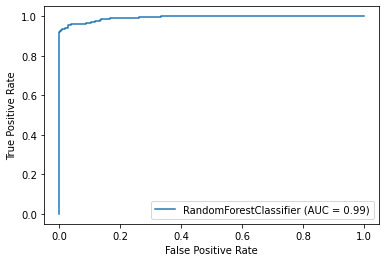

In [69]:
import matplotlib.pyplot as plt  
from sklearn import datasets, metrics, model_selection, svm

y = data_without_null_1.iloc[:,1]
X = data_without_null_1.iloc[:,1:]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=0)
RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)

RF.fit(X, y)

metrics.plot_roc_curve(RF, X_test, y_test)  
plt.show() 

#### Making prediction model based on just data of female has not significant increase in accuracy

In [150]:
df_male = data_without_null_1[data_without_null_1['Gender']== 1]
df_Female = data_without_null_1[data_without_null_1['Gender']== 2]

In [153]:
import sklearn as sk
from sklearn.ensemble import RandomForestClassifier

y = df_Female.iloc[:,1]
X = df_Female.iloc[:,1:]

RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)

RF.fit(X, y)

# define the model evaluation procedure
cv = KFold(n_splits=3, shuffle=True, random_state=1)
# evaluate the model
result = cross_val_score(RF, X, y, cv=cv, scoring='accuracy')
# report the mean performance
print('Accuracy of the model is: %.3f' % result.mean())

Accuracy of the model is: 0.902


#### Similarly, making prediction model based on just data of people with age more than 75 has not significant increase in accuracy for prediction of drug persitency of individuals in this age range

In [156]:
df_75 = data_without_null_1[data_without_null_1['Age_Bucket']== 1]


In [157]:
import sklearn as sk
from sklearn.ensemble import RandomForestClassifier

y = df_75.iloc[:,1]
X = df_75.iloc[:,1:]

RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)

RF.fit(X, y)

# define the model evaluation procedure
cv = KFold(n_splits=3, shuffle=True, random_state=1)
# evaluate the model
result = cross_val_score(RF, X, y, cv=cv, scoring='accuracy')
# report the mean performance
print('Accuracy of the model is: %.3f' % result.mean())

Accuracy of the model is: 0.901


## Logistic Regression

In [179]:
import sklearn as sk
from sklearn.linear_model import LogisticRegression
import pandas as pd
import os

y = data_without_null_1.iloc[:,1]
X = data_without_null_1.iloc[:,1:]

LR = LogisticRegression(random_state=0).fit(X, y)
# define the model evaluation procedure
cv = KFold(n_splits=3, shuffle=True, random_state=1)
# evaluate the model
result = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
# report the mean performance
print('Accuracy: %.3f' % result.mean())

Accuracy: 0.811


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [180]:
for l in ({3000, 3010,3100, 3200}):
    yhat_LR = LR.predict([list(data_without_null_1.iloc[l,1:])])
    if yhat_LR == 1:
        print('The patient % is predicted to not have drug persistence.' %l ) 
    else:
        print('The patient % is predicted to have drug persistence.' %l)

The patient  3000s predicted to not have drug persistence.
The patient  3010s predicted to have drug persistence.
The patient  3100s predicted to not have drug persistence.
The patient  3200s predicted to have drug persistence.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

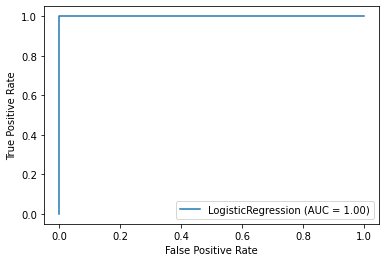

In [80]:
import matplotlib.pyplot as plt  
from sklearn import datasets, metrics, model_selection, svm

y = data_without_null_1.iloc[:,1]
X = data_without_null_1.iloc[:,1:]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=0)
LR = LogisticRegression(random_state=0).fit(X, y)

LR.fit(X, y)

metrics.plot_roc_curve(LR, X_test, y_test)  
plt.show() 

## Neural Networks

In [88]:

import sklearn as sk
from sklearn.neural_network import MLPClassifier

y = data_without_null_1.iloc[:,1]
X = data_without_null_1.iloc[:,1:]

NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
NN.fit(X, y)

# define the model evaluation procedure
cv = KFold(n_splits=3, shuffle=True, random_state=9)
# evaluate the model
result = cross_val_score(NN, X, y, cv=cv, scoring='accuracy')
# report the mean performance
print('Accuracy: %.3f' % result.mean())

Accuracy: 0.979


In [177]:
for l in ({3000, 3010,3100, 3200}):
    yhat_NN = RF.predict([list(data_without_null_1.iloc[l,1:])])
    if yhat_NN == 1:
        print('The patient % is predicted to not have drug persistence.' %l ) 
    else:
        print('The patient % is predicted to have drug persistence.' %l)

The patient  3000s predicted to not have drug persistence.
The patient  3010s predicted to have drug persistence.
The patient  3100s predicted to not have drug persistence.
The patient  3200s predicted to have drug persistence.


In [91]:
yhat_NN = NN.predict([list(data_without_null_1.iloc[3000,1:])])
if yhat_NN == 1:
    print('The patient is predicted to not have drug persistence.' ) 
else:
    print('The patient is predicted to not have drug persistence.')

The patient is predicted to not have drug persistence.


## Ensemble Modeling

In [102]:
from sklearn.ensemble import VotingClassifier

model = VotingClassifier(estimators=[('RF', RF), ('NN', NN), ('LR', LR)], voting='hard')
model.fit(X, y)




The patient is predicted to not have drug persistence.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
yhat_model = model.predict([list(data_without_null_1.iloc[3000,1:])])
if yhat_model == 1:
    print('The patient is predicted to not have drug persistence.' ) 
else:
    print('The patient is predicted to not have drug persistence.')

## Support Vector Machines

In [82]:
import sklearn as sk
from sklearn import svm
import pandas as pd
import os

y = data_without_null_1.iloc[:,1]
X = data_without_null_1.iloc[:,1:]

SVM = svm.LinearSVC()
SVM.fit(X, y)
# define the model evaluation procedure
cv = KFold(n_splits=3, shuffle=True, random_state=1)
# evaluate the model
result = cross_val_score(SVM, X, y, cv=cv, scoring='accuracy')
# report the mean performance
print('Accuracy: %.3f' % result.mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Accuracy: 1.000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


#### Creating and summarizing the dataset.

In [ ]:
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

In [ ]:
# make a prediction with a lda model on the dataset
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
# define model
model = LinearDiscriminantAnalysis()
# fit model
model.fit(X, y)
# define new data
row = [0.12777556,-3.64400522,-2.23268854,-1.82114386,1.75466361,0.1243966,1.03397657,2.35822076,1.01001752,0.56768485]
# make a prediction
yhat = model.predict([row])
# summarize prediction
print('Predicted Class: %d' % yhat)

In [ ]:
type(data_without_null_1.iloc[3000,1])